In [20]:
#loading required libraries
import pickle
import pandas as pd
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import time
import os,sys
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#importing preprocessing utils

from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#calling required ML models
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

#including perfomance matrics for classification
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

#setting display limits to maximum to view data in full scale

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [12]:
#reading the data
data_df=pd.read_csv('bank_marketing_model.csv')
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41188 non-null  int64  
 1   marital                    41188 non-null  object 
 2   default                    41188 non-null  object 
 3   housing                    41188 non-null  object 
 4   loan                       41188 non-null  object 
 5   contact                    41188 non-null  object 
 6   month                      41188 non-null  object 
 7   day_of_week                41188 non-null  object 
 8   duration                   41188 non-null  int64  
 9   campaign                   41188 non-null  int64  
 10  pdays                      41188 non-null  int64  
 11  previous                   41188 non-null  int64  
 12  poutcome                   41188 non-null  object 
 13  employment variation rate  41188 non-null  flo

## catboost classifier

In [93]:
#modelling with catboost, converting columns into category type

data_df['age']=data_df['age'].astype('int')
data_df['job_grouped'] = data_df['job_grouped'].astype('category')
data_df['marital'] = data_df['marital'].astype('category')
data_df['education_grouped'] = data_df['education_grouped'].astype('category')
data_df['default'] = data_df['default'].astype('category')
data_df['housing'] = data_df['housing'].astype('category')
data_df['loan'] = data_df['loan'].astype('category')
data_df['contact'] = data_df['contact'].astype('category')
data_df['month'] = data_df['month'].astype('category')
data_df['day_of_week'] =  data_df['day_of_week'].astype('category')
data_df['duration'] = data_df['duration'].astype(int)
data_df['campaign'] = data_df['campaign'].astype(int)
data_df['pdays'] = data_df['pdays'].astype(int)
data_df['previous'] = data_df['previous'].astype(int)
data_df['poutcome'] = data_df['poutcome'].astype('category')
data_df['deposit']=data_df['deposit'].astype('category')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        41188 non-null  int32   
 1   marital                    41188 non-null  category
 2   default                    41188 non-null  category
 3   housing                    41188 non-null  category
 4   loan                       41188 non-null  category
 5   contact                    41188 non-null  category
 6   month                      41188 non-null  category
 7   day_of_week                41188 non-null  category
 8   duration                   41188 non-null  int32   
 9   campaign                   41188 non-null  int32   
 10  pdays                      41188 non-null  int32   
 11  previous                   41188 non-null  int32   
 12  poutcome                   41188 non-null  category
 13  employment variation rate  4118

In [94]:
#splitting the data for train test and validation
x= data_df.drop('deposit',axis=1)
y= data_df[['deposit']]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=40)
x_train,x_eval,y_train,y_eval=train_test_split(x_train, y_train, test_size=0.2, random_state=40)

In [95]:
#oversampling to compensate for data imbalance

ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(x_train,y_train)


----------------Train RESULTS---------------------
Accuracy of CatBoostClassifier for training: 0.9385432473444613

----------------VALIDATION RESULTS---------------------
Accuracy of CatBoostClassifier for training: 0.8846737481031867
Precision for validation set: 0.4874551971326165
Recall for validation set: 0.7431693989071039

----------------TEST RESULTS---------------------
Accuracy of CatBoostClassifier for test: 0.8896576839038601
Precision for test set: 0.5286439448875997
Recall for test set: 0.7378542510121457

               precision    recall  f1-score   support

           0       0.96      0.91      0.94      7250
           1       0.53      0.74      0.62       988

    accuracy                           0.89      8238
   macro avg       0.75      0.82      0.78      8238
weighted avg       0.91      0.89      0.90      8238



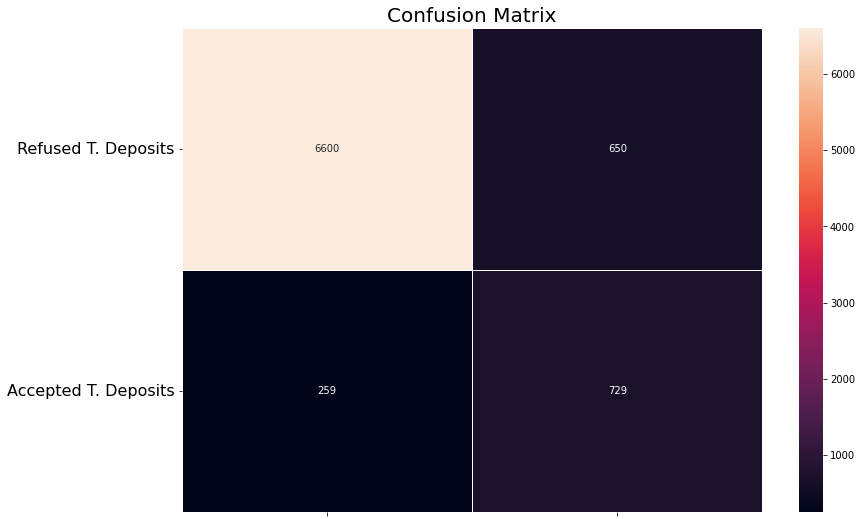

In [96]:
# Initialize CatBoostClassifier
model_cat = CatBoostClassifier(cat_features=[1,2,3,4,5,6,7,12,18,19],verbose=False) 

# Train the model
model_cat.fit(x_ros, y_ros, eval_set=(x_eval, y_eval))

# Make predictions on training data
print("\n----------------Train RESULTS---------------------")
predictions_train = model_cat.predict(x_train)
print("Accuracy of CatBoostClassifier for training:", accuracy_score(y_train, predictions_train))

# Make predictions on validation data
print("\n----------------VALIDATION RESULTS---------------------")
predictions_val = model_cat.predict(x_val)
print("Accuracy of CatBoostClassifier for training:", accuracy_score(y_val, predictions_val))
print("Precision for validation set:", precision_score(y_val, predictions_val))
print("Recall for validation set:", recall_score(y_val, predictions_val))


# Make predictions on test data
predictions_test = model_cat.predict(x_test)
print("\n----------------TEST RESULTS---------------------")
print("Accuracy of CatBoostClassifier for test:", accuracy_score(y_test, predictions_test))
print("Precision for test set:", precision_score(y_test, predictions_test))
print("Recall for test set:", recall_score(y_test, predictions_test))

# Classification report
print("\n", classification_report(y_test, predictions_test))

conf_matrix = confusion_matrix(y_test, predictions_test)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()




In [13]:
#for the other models we will have to encode the categorical features and standardize the numerical features

In [14]:
#standardisation

x=data_df.drop(['job_grouped','education_grouped','month','contact','poutcome','day_of_week',
                'marital', 'housing', 'deposit', 'loan', 'default'],axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std=scaler.fit_transform(x)
data_std=pd.DataFrame(data_std,columns=x.columns[:])
data_df.drop(columns=x.columns[:],inplace=True)
data_df = pd.concat([data_df, data_std], axis=1)

In [15]:
#label encoding

categorical_bool_cols = ['marital', 'housing', 'deposit', 'loan', 'default']

encoder =LabelEncoder()
encoded_features = []

for col in categorical_bool_cols:
    encoder.fit(data_df[col])
    encoded_feature = encoder.transform(data_df[col])
    data_df[col] = encoded_feature

In [16]:
#one hot encoding

categorical_cols = ['job_grouped','education_grouped','month','contact','poutcome','day_of_week']
#fit encoder
encoder = OneHotEncoder(sparse=False)
#transform
encoder.fit(data_df[categorical_cols])
encoded_features = list(encoder.get_feature_names_out(categorical_cols))
data_df[encoded_features] = encoder.transform(data_df[categorical_cols])

# drop original features
data_df.drop(categorical_cols,axis=1,inplace=True)

In [17]:
#splitting the data for train test and validation
x= data_df.drop('deposit',axis=1)
y= data_df[['deposit']]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=50)

In [18]:
ros=RandomOverSampler()

x_ros,y_ros=ros.fit_resample(x_train,y_train)

## Logistic Regression 

accuracy of LogisticRegression for train: 0.8686042538652089 


----------------VALIDATION RESULTS---------------------
accuracy of LogisticRegression for validation: 0.8658573596358118
Precision for validation set: 0.4529569892473118
Recall for validation set: 0.9059139784946236

----------------TEST RESULTS---------------------
accuracy of LogisticRegression for test: 0.8548191308570041
Precision for test set: 0.43580375782881003
Recall for test set: 0.8789473684210526

               precision    recall  f1-score   support

           0       0.98      0.85      0.91      7288
           1       0.44      0.88      0.58       950

    accuracy                           0.85      8238
   macro avg       0.71      0.87      0.75      8238
weighted avg       0.92      0.85      0.87      8238



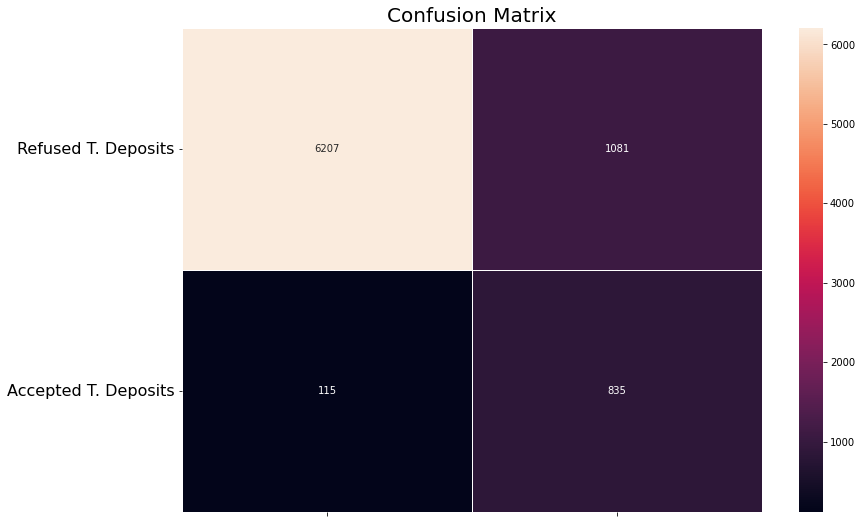

In [89]:
model_lr= LogisticRegression()
model_lr.fit(x_ros,y_ros)

predictions_test=model_lr.predict(x_ros)
print("accuracy of LogisticRegression for train:",accuracy_score(y_ros,predictions_test),'\n')


print("\n----------------VALIDATION RESULTS---------------------")

predictions_val=model_lr.predict(x_val)
print("accuracy of LogisticRegression for validation:",accuracy_score(y_val,predictions_val))
precision = precision_score(y_val, predictions_val)
recall = recall_score(y_val, predictions_val)
print("Precision for validation set:", precision)
print("Recall for validation set:", recall)

print("\n----------------TEST RESULTS---------------------")

predictions_test=model_lr.predict(x_test)
print("accuracy of LogisticRegression for test:",accuracy_score(y_test,predictions_test))
precision = precision_score(y_test, predictions_test)
recall = recall_score(y_test, predictions_test)
print("Precision for test set:", precision)
print("Recall for test set:", recall)

print('\n',classification_report(y_test,predictions_test))

conf_matrix = confusion_matrix(y_test, predictions_test)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()


accuracy of AdaBoostClassifier for train: 0.8752455795677799 


----------------VALIDATION RESULTS---------------------
accuracy of AdaBoostClassifier for validation: 0.8705614567526555
Precision for validation set: 0.46238785369220153
Recall for validation set: 0.9005376344086021

----------------TEST RESULTS---------------------
accuracy of AdaBoostClassifier for test: 0.860403010439427
Precision for test set: 0.4464668094218415
Recall for test set: 0.8778947368421053

               precision    recall  f1-score   support

           0       0.98      0.86      0.92      7288
           1       0.45      0.88      0.59       950

    accuracy                           0.86      8238
   macro avg       0.71      0.87      0.75      8238
weighted avg       0.92      0.86      0.88      8238



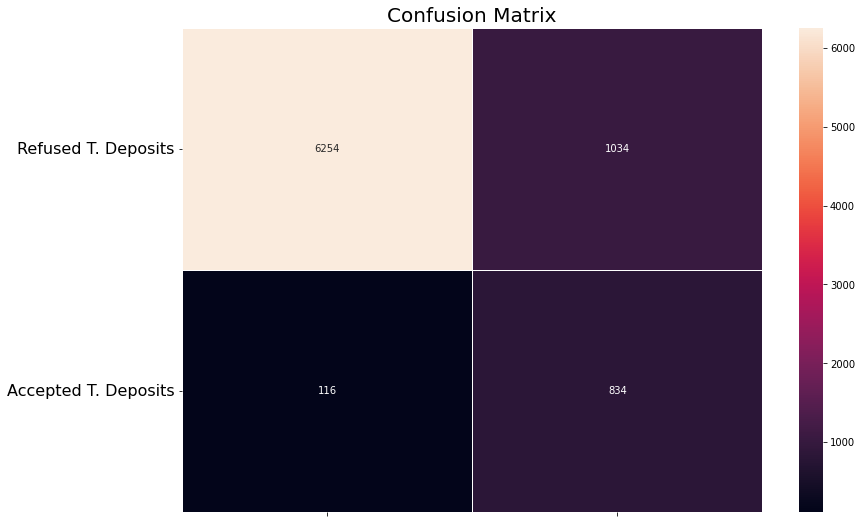

In [87]:
model_adaboost=AdaBoostClassifier(random_state=1)
model_adaboost.fit(x_ros,y_ros)


predictions_train=model_adaboost.predict(x_ros)
print("accuracy of AdaBoostClassifier for train:",accuracy_score(y_ros,predictions_train),'\n')

print("\n----------------VALIDATION RESULTS---------------------")

predictions_val=model_adaboost.predict(x_val)
print("accuracy of AdaBoostClassifier for validation:",accuracy_score(y_val,predictions_val))
precision = precision_score(y_val, predictions_val)
recall = recall_score(y_val, predictions_val)
print("Precision for validation set:", precision)
print("Recall for validation set:", recall)

print("\n----------------TEST RESULTS---------------------")

predictions_test=model_adaboost.predict(x_test)
print("accuracy of AdaBoostClassifier for test:",accuracy_score(y_test,predictions_test))
precision = precision_score(y_test, predictions_test)
recall = recall_score(y_test, predictions_test)
print("Precision for test set:", precision)
print("Recall for test set:", recall)

print('\n',classification_report(y_test,predictions_test))

conf_matrix = confusion_matrix(y_test, predictions_test)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

## XG Boost Classifier


----------------TRAIN RESULTS---------------------

accuracy of XGBClassifier for train: 0.9594686939437943
Precision for train set: 0.9328478313349964
Recall for train set: 0.9902195267788503

----------------VALIDATION RESULTS---------------------

accuracy of XGBClassifier for validation: 0.895144157814871
Precision for validation set: 0.52191894127378
Recall for validation set: 0.8481182795698925

----------------TEST RESULTS---------------------

accuracy of XGBClassifier for test: 0.8835882495751396
Precision for test set: 0.4970414201183432
Recall for test set: 0.7957894736842105

               precision    recall  f1-score   support

           0       0.97      0.90      0.93      7288
           1       0.50      0.80      0.61       950

    accuracy                           0.88      8238
   macro avg       0.73      0.85      0.77      8238
weighted avg       0.92      0.88      0.89      8238



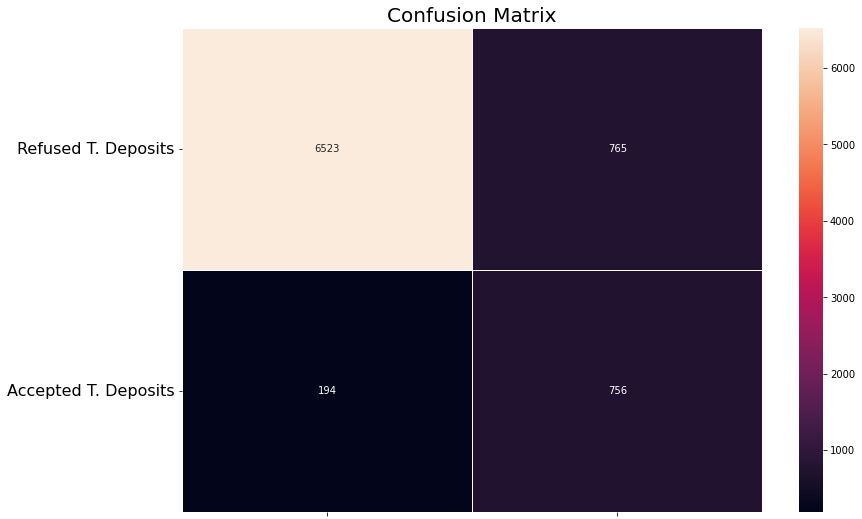

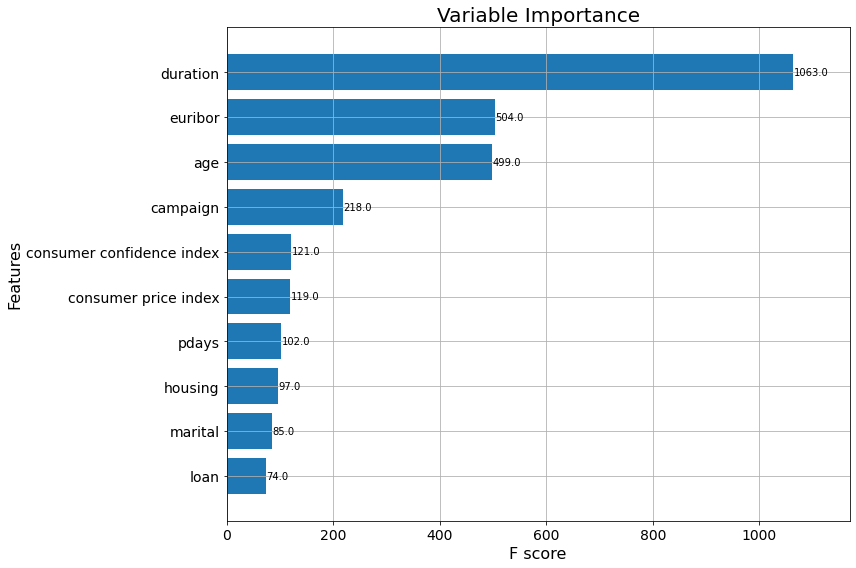

In [23]:
model_xg=XGBClassifier()
model_xg.fit(x_ros,y_ros)

print("\n----------------TRAIN RESULTS---------------------\n")

predictions_train=model_xg.predict(x_ros)
print("accuracy of XGBClassifier for train:",accuracy_score(y_ros,predictions_train))
precision = precision_score(y_ros, predictions_train)
recall = recall_score(y_ros, predictions_train)
print("Precision for train set:", precision)
print("Recall for train set:", recall)


print("\n----------------VALIDATION RESULTS---------------------\n")

predictions_val=model_xg.predict(x_val)
print("accuracy of XGBClassifier for validation:",accuracy_score(y_val,predictions_val))
precision = precision_score(y_val, predictions_val)
recall = recall_score(y_val, predictions_val)
print("Precision for validation set:", precision)
print("Recall for validation set:", recall)

print("\n----------------TEST RESULTS---------------------\n")

predictions_test=model_xg.predict(x_test)
print("accuracy of XGBClassifier for test:",accuracy_score(y_test,predictions_test))
precision = precision_score(y_test, predictions_test)
recall = recall_score(y_test, predictions_test)
print("Precision for test set:", precision)
print("Recall for test set:", recall)

print('\n',classification_report(y_test,predictions_test))

conf_matrix = confusion_matrix(y_test, predictions_test)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

plt.figure(figsize=(12, 8))
ax = plt.gca()

# Plot variable importance
plot_importance(model_xg, ax=ax, max_num_features=10, height=0.8, importance_type='weight')

# Customize the appearance
ax.set_title('Variable Importance', fontsize=20)
ax.set_xlabel('F score', fontsize=16)
ax.set_ylabel('Features', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

# Show the plot
plt.show()
